# **CIFAR-10 REPORT BY MINDAUGAS SKOCEKAS**


# Defining the problem

In this report I will be experimenting with a dataset called CIFAR-10 to predict different classes of the image. The dataset contains ten object classes which are for the airplane, automobile, bird, cat, deer, dog, frog, horse, ship and truck. Each object class holds 6000 images. Therefore, the problem that I am trying to solve is to help my machine to learn how to predict one of my image inputs to recognise in which class each picture belongs. Hence,it is a multi-class image classification problem that I am trying to solve. I can get on with this expermentation as I followed all the steps to hypothesize that my expermitation will be successful because the data-set that I am currently using can predict my outputs with my current inputs. Please follow my expermentation below for the evidence.

# Measuring success

I will be measuring success by the accuracy of each image labelling. Hence, since I am trying to solve classification problem- the loss fuction will be cross-entropy as the probability value will be between 0 and 1. When the predicted probability approaches 1, the loss will decrease and the probability of guessing the image will improve.

# Evaluation Protocol
The protocol that I am planning to use is hold-out validation as there are plenty of data available for me. This data set has two sets- training set and the testing set. I will be intending to use different dropout rates, regularasations and try out differenct capacities. After each test there will be graphs that I will evaluate and add extra things accordingly.

# Data Preparation




Preparing the data that will be used for five different models, loading the dataset and then performing one-hot:

In [ ]:
# importing libraries/layers/regularizers for my models.
import tensorflow as tf
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt


# load the database
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
#One Hot
x_train = x_train.astype('float32') /255
x_test = x_test.astype('float32') /255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Beat Baseline

The first test model, batch normalization is used as the testing is done with 10+ epochs.

In [ ]:
# Creating a model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Dense(300, activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))





# compiling my model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 30, 32)        128       
_________________________________________________________________
dense (Dense)                (None, 30, 30, 300)       9900      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 300)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 32)        86432     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
dense_1 (Dense)              (None, 6, 6, 128)         4

# Scaling Up

Training of the data. Batch size: 150, epochs: 20.

Test 1/5:

In [ ]:
# training data
history = model.fit(x_train, y_train, batch_size=150, epochs=20, verbose=1, validation_data=(x_test, y_test))

Epoch 1/20
334/334 [==============================] - 10s 29ms/step - loss: 1.5140 - accuracy: 0.4561 - val_loss: 1.7226 - val_accuracy: 0.4800
Epoch 2/20
334/334 [==============================] - 10s 29ms/step - loss: 1.1606 - accuracy: 0.5897 - val_loss: 1.1556 - val_accuracy: 0.5894
Epoch 3/20
334/334 [==============================] - 10s 29ms/step - loss: 1.0409 - accuracy: 0.6358 - val_loss: 1.0867 - val_accuracy: 0.6123
Epoch 4/20
334/334 [==============================] - 10s 29ms/step - loss: 0.9448 - accuracy: 0.6723 - val_loss: 0.9626 - val_accuracy: 0.6645
Epoch 5/20
334/334 [==============================] - 10s 29ms/step - loss: 0.8813 - accuracy: 0.6928 - val_loss: 0.9575 - val_accuracy: 0.6747
Epoch 6/20
334/334 [==============================] - 10s 29ms/step - loss: 0.8307 - accuracy: 0.7102 - val_loss: 0.9299 - val_accuracy: 0.6804
Epoch 7/20
334/334 [==============================] - 10s 29ms/step - loss: 0.7891 - accuracy: 0.7240 - val_loss: 0.9604 - val_accuracy:

Plotting the results:

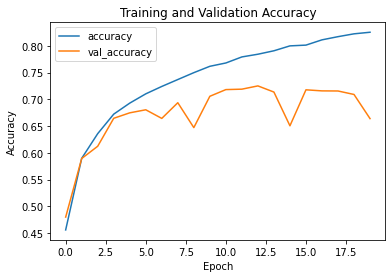

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

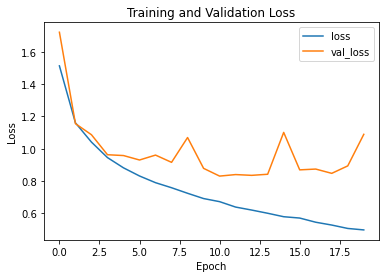

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['loss', 'val_loss'], loc='upper right')

The model above clearly produces overfitting as the value loss is higher than loss. The accuracy that is achieved with this model is around 70%.

# Regularising Tuning

Other four tests are done below:

Test 2/5:

A slight change to the model, this time using Dropout to achieve regulazation and get better results. Batch size changed to 250 and epochs to 30.

In [ ]:
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)))
    model.add(BatchNormalization())
    model.add(MaxPool2D(2, 2))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, 3, 3, activation='relu'))
    model.add(MaxPool2D(2, 2))
    model.add(Flatten())
    model.add(Dropout(0.2))
    model.add(Dropout(0.5))
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential_54"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_139 (Conv2D)          (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization_32 (Batc (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d_91 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_98 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_140 (Conv2D)          (None, 5, 5, 64)          18496     
_________________________________________________________________
max_pooling2d_92 (MaxPooling (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_35 (Flatten)         (None, 256)             

In [ ]:
history = model.fit(x_train, y_train, batch_size=250, epochs=30, verbose=1, validation_data=(x_test, y_test))

Epoch 1/30
200/200 [==============================] - 2s 10ms/step - loss: 1.9685 - accuracy: 0.2590 - val_loss: 2.1973 - val_accuracy: 0.2042
Epoch 2/30
200/200 [==============================] - 2s 8ms/step - loss: 1.7314 - accuracy: 0.3469 - val_loss: 2.0168 - val_accuracy: 0.2571
Epoch 3/30
200/200 [==============================] - 2s 8ms/step - loss: 1.6491 - accuracy: 0.3862 - val_loss: 1.6937 - val_accuracy: 0.4183
Epoch 4/30
200/200 [==============================] - 2s 8ms/step - loss: 1.6028 - accuracy: 0.4090 - val_loss: 1.4875 - val_accuracy: 0.4721
Epoch 5/30
200/200 [==============================] - 2s 8ms/step - loss: 1.5676 - accuracy: 0.4181 - val_loss: 1.4861 - val_accuracy: 0.4728
Epoch 6/30
200/200 [==============================] - 2s 8ms/step - loss: 1.5334 - accuracy: 0.4367 - val_loss: 1.4386 - val_accuracy: 0.4873
Epoch 7/30
200/200 [==============================] - 2s 8ms/step - loss: 1.5159 - accuracy: 0.4438 - val_loss: 1.4218 - val_accuracy: 0.4998
Epoch

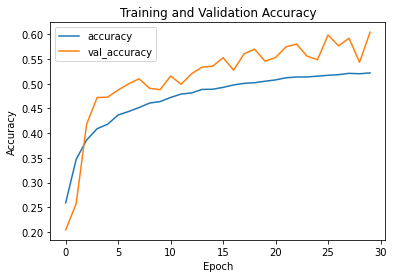

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

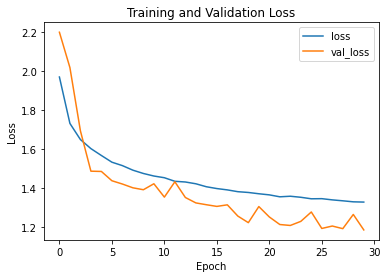

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['loss', 'val_loss'], loc='upper right')

The example above shows us underfitting model. This time, the loss is higher than value loss. In the graph above, it is visible that the yellow line is going down. The model has to be improved now.

Test 3/5:

Adding more layers to my model to fix underfitting that was achieved in the graph above. This time experimenting with 128 batch size and 30 epochs.

In [ ]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.5))

model.add(Conv2D(filters=64, kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.5))

model.add(Conv2D(filters=128, kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(1,1))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential_158"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_554 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_295 (Bat (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_555 (Conv2D)          (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_275 (MaxPoolin (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_298 (Dropout)        (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_556 (Conv2D)          (None, 13, 13, 64)        18496     
_________________________________________________________________
batch_normalization_296 (Bat (None, 13, 13, 64)     

In [ ]:
history = model.fit(x_train, y_train, batch_size=128, epochs=40, verbose=1, validation_data=(x_test, y_test))

Epoch 1/40
391/391 [==============================] - 5s 12ms/step - loss: 1.8260 - accuracy: 0.3477 - val_loss: 2.5649 - val_accuracy: 0.2569
Epoch 2/40
391/391 [==============================] - 4s 11ms/step - loss: 1.4136 - accuracy: 0.4915 - val_loss: 1.2527 - val_accuracy: 0.5550
Epoch 3/40
391/391 [==============================] - 4s 11ms/step - loss: 1.2577 - accuracy: 0.5532 - val_loss: 1.2455 - val_accuracy: 0.5659
Epoch 4/40
391/391 [==============================] - 4s 11ms/step - loss: 1.1544 - accuracy: 0.5926 - val_loss: 1.1624 - val_accuracy: 0.5936
Epoch 5/40
391/391 [==============================] - 4s 11ms/step - loss: 1.0863 - accuracy: 0.6154 - val_loss: 1.0093 - val_accuracy: 0.6503
Epoch 6/40
391/391 [==============================] - 4s 11ms/step - loss: 1.0226 - accuracy: 0.6399 - val_loss: 0.9759 - val_accuracy: 0.6612
Epoch 7/40
391/391 [==============================] - 4s 11ms/step - loss: 0.9742 - accuracy: 0.6594 - val_loss: 0.9051 - val_accuracy: 0.6884

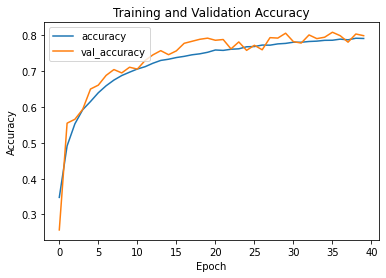

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

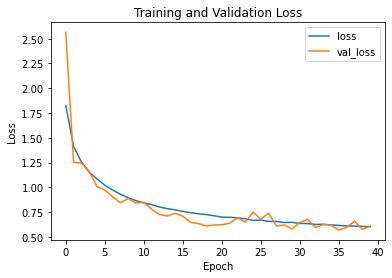

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['loss', 'val_loss'], loc='upper right')

In this graph, better results are seen but improvements are needeed to get a better accuracy.

Test 4/5:


Improving the model to achieve better accuracy. Adding another Dense layer. Batch size is decresed from 128 to 64 and 40 epochs.

In [ ]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.4))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding = 'same', activation='relu', input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.4))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_48 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_37 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
batch_normalization_38 (Batc (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_27 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 15, 15, 64)       

In [ ]:
history = model.fit(x_train, y_train, batch_size=64, epochs=40, verbose=1, validation_data=(x_test, y_test))

Epoch 1/40
782/782 [==============================] - 7s 9ms/step - loss: 1.6961 - accuracy: 0.4023 - val_loss: 1.4385 - val_accuracy: 0.5052
Epoch 2/40
782/782 [==============================] - 7s 8ms/step - loss: 1.2200 - accuracy: 0.5653 - val_loss: 0.9978 - val_accuracy: 0.6457
Epoch 3/40
782/782 [==============================] - 7s 8ms/step - loss: 1.0448 - accuracy: 0.6343 - val_loss: 0.8438 - val_accuracy: 0.7031
Epoch 4/40
782/782 [==============================] - 7s 8ms/step - loss: 0.9379 - accuracy: 0.6733 - val_loss: 0.8097 - val_accuracy: 0.7140
Epoch 5/40
782/782 [==============================] - 6s 8ms/step - loss: 0.8697 - accuracy: 0.6980 - val_loss: 0.8924 - val_accuracy: 0.6945
Epoch 6/40
782/782 [==============================] - 6s 8ms/step - loss: 0.8139 - accuracy: 0.7193 - val_loss: 0.7259 - val_accuracy: 0.7524
Epoch 7/40
782/782 [==============================] - 6s 8ms/step - loss: 0.7673 - accuracy: 0.7363 - val_loss: 0.6373 - val_accuracy: 0.7799
Epoch 

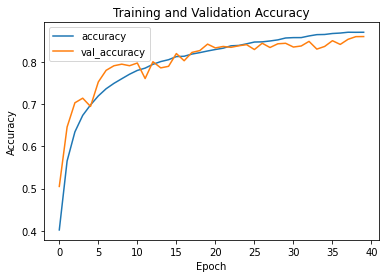

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

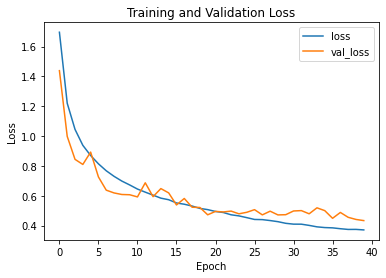

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['loss', 'val_loss'], loc='upper right')

The accuracy improved to around 80%, but the model starts to overfit at the end.

Test 5/5:

Few changes are made. Added more Dense layers, and modified my Conv2d layers. 256 batch size and 50 epochs are used for this training.

In [ ]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.4))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding = 'same', activation='relu', input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.4))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_78 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_61 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_79 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
batch_normalization_62 (Batc (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_48 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_80 (Conv2D)           (None, 15, 15, 64)      

In [ ]:
history = model.fit(x_train, y_train, batch_size=256, epochs=50, verbose=1, validation_data=(x_test, y_test))

Epoch 1/50
196/196 [==============================] - 5s 25ms/step - loss: 2.1045 - accuracy: 0.2040 - val_loss: 2.7618 - val_accuracy: 0.1135
Epoch 2/50
196/196 [==============================] - 5s 23ms/step - loss: 1.7033 - accuracy: 0.3442 - val_loss: 2.7203 - val_accuracy: 0.1536
Epoch 3/50
196/196 [==============================] - 5s 23ms/step - loss: 1.5084 - accuracy: 0.4386 - val_loss: 1.6215 - val_accuracy: 0.4451
Epoch 4/50
196/196 [==============================] - 5s 23ms/step - loss: 1.3595 - accuracy: 0.5097 - val_loss: 1.6554 - val_accuracy: 0.4320
Epoch 5/50
196/196 [==============================] - 5s 23ms/step - loss: 1.2322 - accuracy: 0.5682 - val_loss: 1.0590 - val_accuracy: 0.6202
Epoch 6/50
196/196 [==============================] - 5s 23ms/step - loss: 1.1370 - accuracy: 0.6072 - val_loss: 1.0284 - val_accuracy: 0.6294
Epoch 7/50
196/196 [==============================] - 5s 23ms/step - loss: 1.0637 - accuracy: 0.6334 - val_loss: 1.0155 - val_accuracy: 0.6446

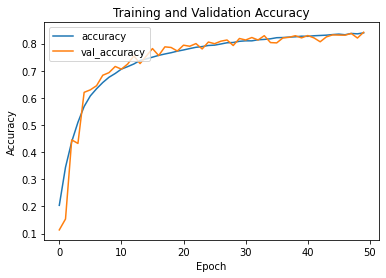

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

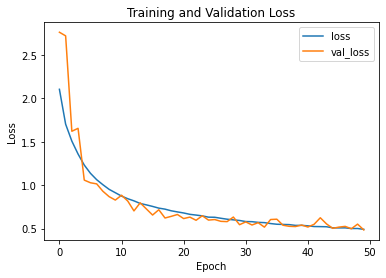

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['loss', 'val_loss'], loc='upper right')

This model managed to achieve +80% accuracy and fixed the overfitting problem.


Bonus test:
This is the final test where I have experimented using L2 regularizer. It improved the training and validation loss, but not the accuracy of my model. Batch size and epochs number stays the same.

In [ ]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.4))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding = 'same', activation='relu', input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3,3),  activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.4))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(512, kernel_regularizer=regularizers.l1(0.001),activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(128, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())
history = model.fit(x_train, y_train, batch_size=256, epochs=50, verbose=1, validation_data=(x_test, y_test))

Model: "sequential_50"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_277 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_260 (Bat (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_278 (Conv2D)          (None, 30, 30, 32)        9248      
_________________________________________________________________
batch_normalization_261 (Bat (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d_138 (MaxPoolin (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_225 (Dropout)        (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_279 (Conv2D)          (None, 15, 15, 64)      

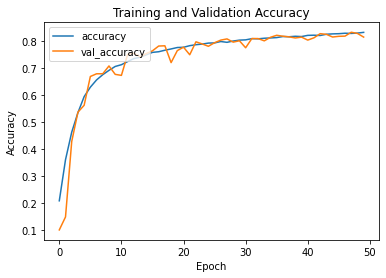

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

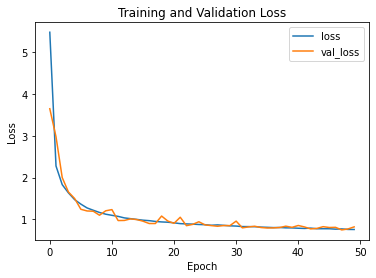

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['loss', 'val_loss'], loc='upper right')

This is the end of my report. The best results that I have achieved are presented in the test 5 and in my bonus test as there is no overfitting or underfitting and the accuracy of the training is +80%.